# More Plotting

In this notebook we'll go over additional plotting tips and tricks. We'll be going over additional `matplotlib` functionality as well as adding in a new package `seaborn`. These notes are a combination of information found [here](https://elitedatascience.com/python-seaborn-tutorial), [here](http://seaborn.pydata.org/examples/), and in chapter 9 of [this book](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_3?ie=UTF8&qid=1533828324&sr=8-3&keywords=python+for+data+analysis).

Let's start by importing all of the packages we'll be using in this tutorial. Note you may need to install `pandas` and `seaborn` using `pip install` in your command prompt or terminal.

Note: We aren't learning about it in this notebook, but you'll also need to import `datetime`.

In [1]:
# Note this code snippet is just to tell jupyter notebook that we're using matplotlib
%matplotlib inline

# You've seen this package before
import matplotlib
import matplotlib.pyplot as plt

# These two will be new to you
import pandas as pd
import seaborn as sns

# Don't worry about learning this package today
from datetime import datetime

We've seen `matplotlib.pyplot` before in these notebooks as we've plotted random walks, functions we wish to integrate, and networks. `matplotlib` was built with the aim of recreating `MATLAB`'s plotting capabilities in python. We'll learn a few new things for this package, but we'll mostly be focusing on `seaborn` today.

The other two packages are new to you. `pandas` is a way for you to handle data within python. It is highly utilized in data science and machine learning. For our purposes today we will only use the barebones functionality of pandas. We will likely learn more about pandas in our machine learning notebooks. `seaborn` is a package meant to expand upon the graphing capabilities of `matplotlib`. If you have used `R` before it is very similar to the `R` package `ggplot2`, an excellent visualization tool.

## More `matplotlib`

We'll start by expanding our `matplotlib` competency. We first need something to plot, let's use our random walk from before.

In [2]:
import random


# Define biased_flip in this notebook
def biased_flip(H_prob):
    flip = random.random()
    if flip < H_prob:
        return "H"
    else:
        return "T"
  
# Define BiasWalk in this notebook
def BiasWalk(NumSteps,H_prob):
    # We start at 0
    CurrentPosition = 0
    
    # Initializing a list
    Positions = [CurrentPosition]
    
    # For each step we'll flip a biased coin and check the outcome
    for i in range(NumSteps):
        CoinFlip = biased_flip(H_prob)
        
        if CoinFlip == "H":
            # If heads we step forward
            CurrentPosition = CurrentPosition + 1
            
        elif CoinFlip == "T":
            # If tails we step back
            CurrentPosition = CurrentPosition - 1
        
        # Add our Current Position to the running list of positions
        Positions.append(CurrentPosition)
    
    return Positions   
    

In [3]:
# Now let's make a random walk
NumSteps = 100
H_prob = .37

Positions = BiasWalk(NumSteps,H_prob)
Steps = range(len(Positions))

Recall how we plotted before:

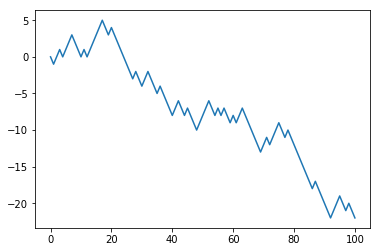

In [4]:
plt.plot(Steps,Positions)
plt.show()

However let's get a little fancier.

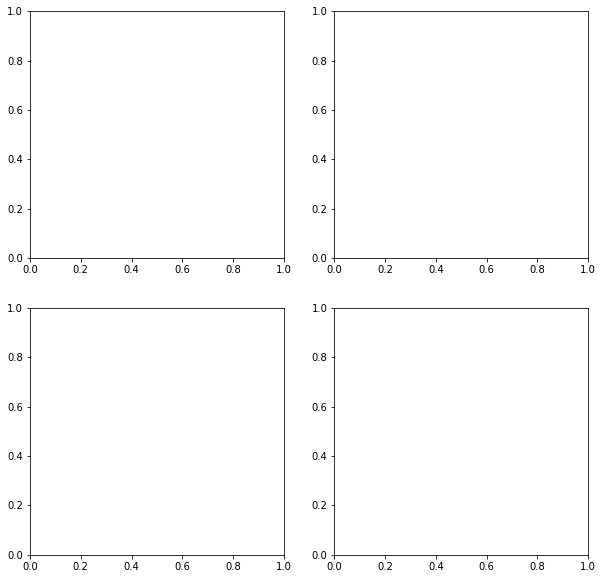

In [5]:
# Make a figure here and call it fig
fig = plt.figure(figsize = (10,10))

# We can add in some subplots too!
sp1 = fig.add_subplot(2,2,1)
# The above line of codes says, we want to add a subplot to fig
# that fig should be broken up into a 2 x 2 grid, and that sp1
# should go in the first position
sp2 = fig.add_subplot(2,2,2)
sp3 = fig.add_subplot(2,2,3)
sp4 = fig.add_subplot(2,2,4)

plt.show()

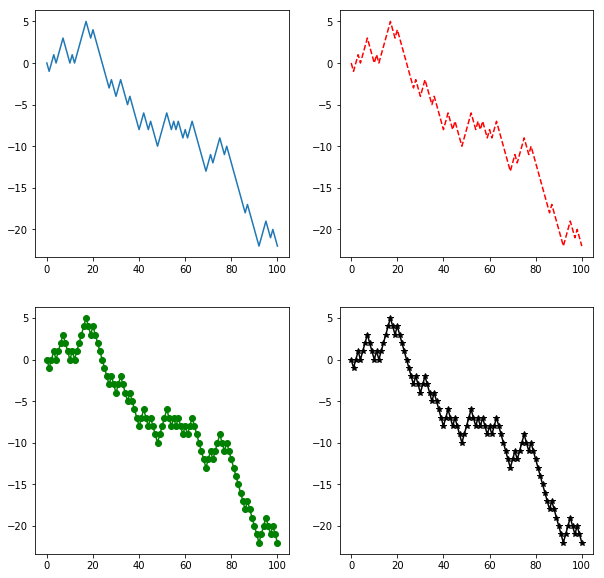

In [6]:
# Let's add figures to these subplots

fig = plt.figure(figsize = (10,10))


sp1 = fig.add_subplot(2,2,1)
sp2 = fig.add_subplot(2,2,2)
sp3 = fig.add_subplot(2,2,3)
sp4 = fig.add_subplot(2,2,4)

sp1.plot(Steps,Positions)
sp2.plot(Steps,Positions,'r--')
sp3.plot(Steps,Positions,'g-o')
sp4.plot(Steps,Positions,'k-*')

plt.show()

You can determine what your plot looks like using key arguments denoted by `''`. Here's a quick rundown of what can be put in the key arguments.

| Color           | Description  |
| :-------------: |:------------:|
| r               | red          |
| b               | blue         |
| k               | black        |
| g               | green        |
| y               | yellow       |
| m               | magenta      |
| c               | cyan         |
| w               | white        |

|Line Style | Description   |
|:---------:|:-------------:|
| -         | Solid line    |
| --        | Dashed line   |
| :         | Dotted line   |
| -.        | Dash-dot line |

| Marker | Description    |
|:------:|:--------------:|
|o       | Circle         |
|+       | Plus Sign      |
|*       | Asterisk       |
|.       | Point          |
| x      | Cross          |
| s      | Square         |
|d       | Diamond        |
|^       | Up Triangle    |
|<       | Right Triangle |
|>       | Left Triangle  |
|p       | Pentagram      |
| h      | hexagram       |



### Exercise

#### Make four biased random walks of 50 steps. Make a figure and plot each walk on it's own subfigure.

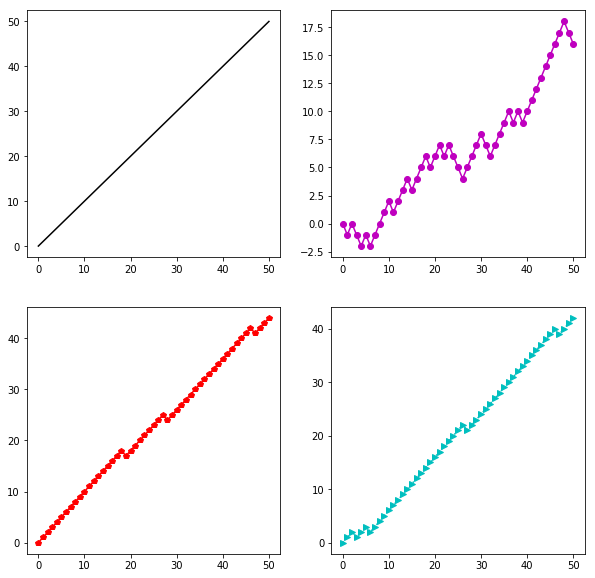

In [8]:
# Put your code here
NumSteps = 50

Positions1 = BiasWalk(NumSteps,random.random())
Positions2 = BiasWalk(NumSteps,random.random())
Positions3 = BiasWalk(NumSteps,random.random())
Positions4 = BiasWalk(NumSteps,random.random())
Steps = range(len(Positions1))

fig = plt.figure(figsize=(10,10))

sp1 = fig.add_subplot(2,2,1)
sp2 = fig.add_subplot(2,2,2)
sp3 = fig.add_subplot(2,2,3)
sp4 = fig.add_subplot(2,2,4)

sp1.plot(Steps,Positions1,'k-')
sp2.plot(Steps,Positions2,'m-o')
sp3.plot(Steps,Positions3,'r-p')
sp4.plot(Steps,Positions4,'c:>')

plt.show()

We can also change the draw-style of our lines.

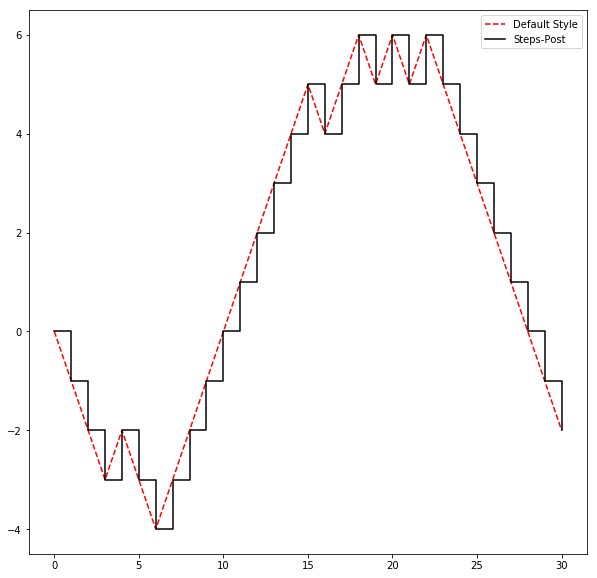

In [9]:
# Make a new random walk
NumSteps = 30
H_prob = .45

Positions = BiasWalk(NumSteps,H_prob)
Steps = range(len(Positions))

plt.figure(figsize=(10,10))

# The default plot
plt.plot(Steps,Positions,'r--',label = "Default Style")

# A steps-post plot
plt.plot(Steps,Positions,'k',drawstyle = 'steps-post',label = "Steps-Post")

# Add a legend
plt.legend(loc = 'best')

plt.show()

## Seaborn

We're going to import a fun dataset on Pok&eacute;mon to learn about some of the cool things `seaborn` can do. Run the following line of code.

In [10]:
# Read in the data (Note if you run Mac you made need to change / to \)
pokemon = pd.read_csv('Data/pokemon.csv',index_col = 0)

In [11]:
# This is what a pandas dataframe looks like
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


This dataset contains the base stats of each of the original 151 Pok&eacute;mon.

As you can see each pok&eacute;mon has a number of important stats to consider. If you want to become a Pok&eacute;mon Master you really want to understand the intricacies of these stats. 

For instance perhaps you're interested in understanding the balance between the `Attack` and `Defense` stats. We can try to accomplish this through a scatter plot.

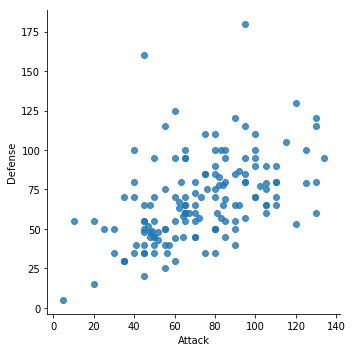

In [12]:
# Making a scatter plot in seaborn
sns.lmplot(data = pokemon, x = 'Attack', y = 'Defense',fit_reg = False)
plt.show()

The above code uses `seaborn`'s linear regression plot function to make a scatter plot. We input the argument `fit_reg` to `False` because we wanted to ignore the linear regression line. Let's see what happens when we leave out this argument.

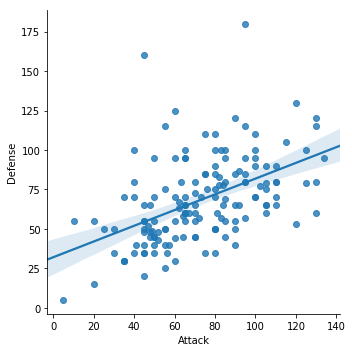

In [13]:
# Making a scatter plot in seaborn with a linear regression line
sns.lmplot(data = pokemon, x = 'Attack', y = 'Defense')
plt.show()

These plots are nice, but it would help us better identify what pok&eacute;mon we want on our team to somehow try and id which ones tend to have the best stats. We can color our dots according to their `Stage` and see if that has any bearing on their stats.

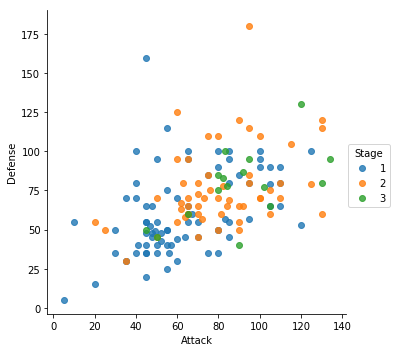

In [14]:
# Using hue to color by stage
sns.lmplot(x='Attack',y='Defense',data = pokemon,
          fit_reg=False, hue = 'Stage')
plt.show()

For the most part those in stage 1 have low stats while those in stages 1 or 2 have higher stats.

### Exercise

#### Use a scatter plot to explore how `Type 1` impacts the `Attack` and `Defense` stats

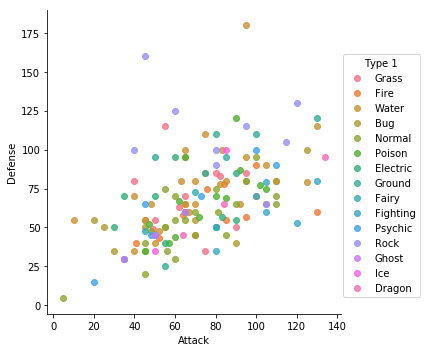

In [15]:
# Put your code here
sns.lmplot(x = 'Attack', y = 'Defense', data = pokemon,
            fit_reg = False, hue = 'Type 1')

plt.show()





While this plot helps us identify which types have outliers, it isn't the best for helping us discover trends amongst the data. Let's learn some new methods for helping with that.

### Box and Whisker Plots

Box and whisker plots are a good way to understand the distribution of values for a particular statistic. We can make these in seaborn with the command `boxplot()`.

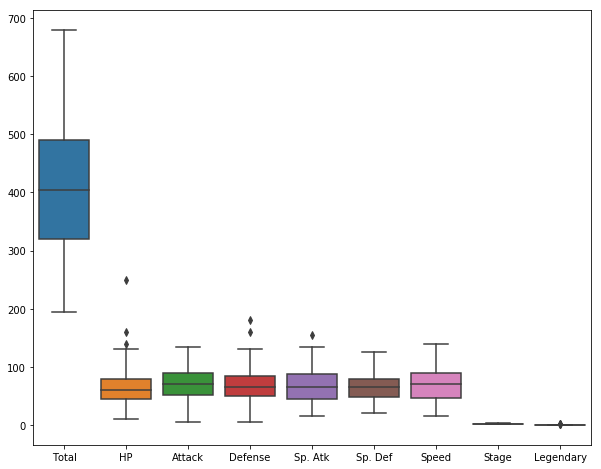

In [16]:
plt.figure(figsize = (10,8))
sns.boxplot(data = pokemon)
plt.show()

Making a boxplot with every variable doesn't make the most sense. Sadly if we want to plot multiple variables at once, there is no way to choose what variables are plotted using just `seaborn`. We will have to alter our dataframe to only include the variables we want plotted. For us we'll plot: `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

In [17]:
# This code only copies the columns of pokemon that we want
pokemon_stats = pokemon[['HP','Attack','Defense','Sp. Atk', 'Sp. Def','Speed']]

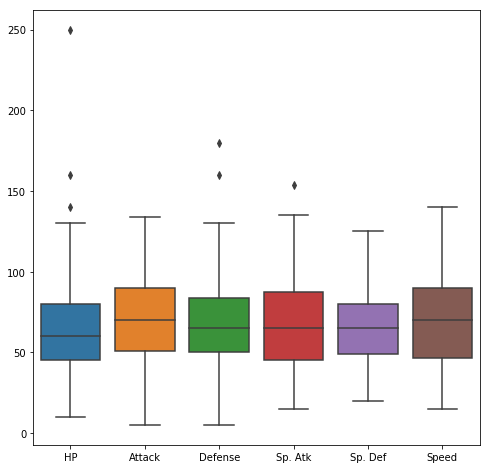

In [18]:
# Now we can plot the boxplot
plt.figure(figsize=(8,8))
sns.boxplot(data=pokemon_stats)
plt.show()

We could also look at a specific stat and examine the box and whisker plot by some sort of grouping.

Let's see if there is a difference in `HP` based on what `Stage` the pok&eacute;mon is.

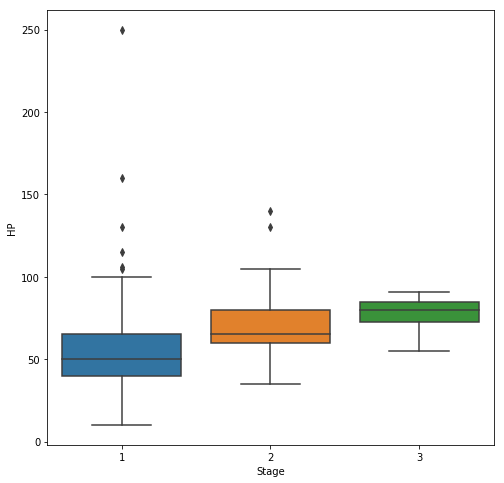

In [19]:
plt.figure(figsize=(8,8))


sns.boxplot(data=pokemon, x='Stage', y = 'HP')
plt.show()

### Exercise

#### Do some types seem to have higher `Attack` than others? Higher `Defense`?

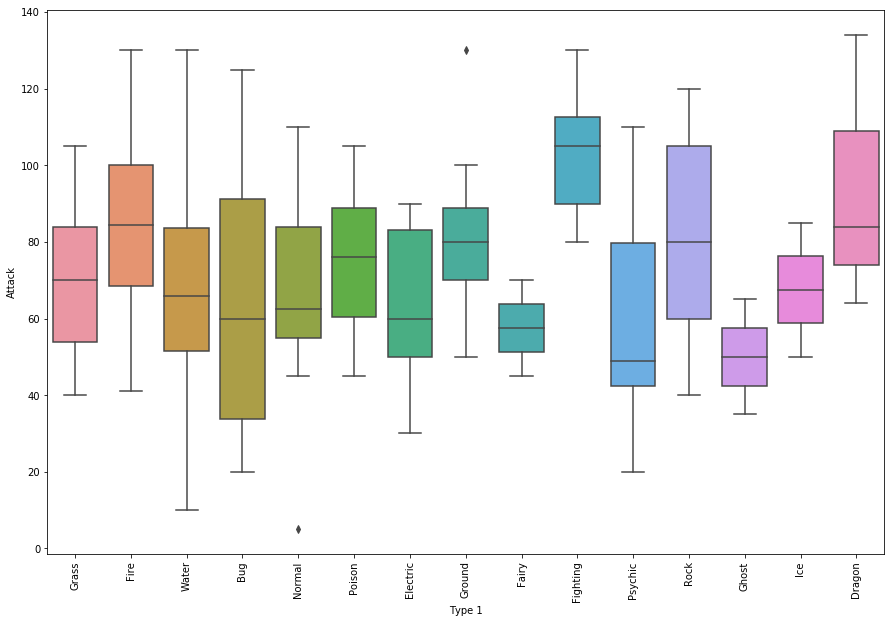

In [20]:
# Do your work here 
plt.figure(figsize = (15,10))
sns.boxplot(data = pokemon, x = 'Type 1', y ='Attack')



# Uncomment the below code to rotate your x-labels
plt.xticks(rotation=90)

plt.show()





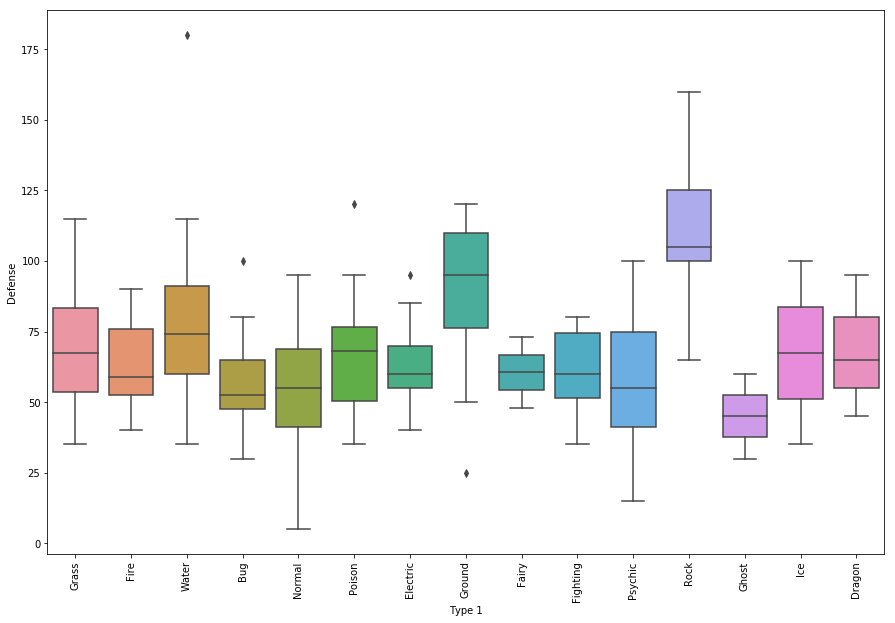

In [21]:
# Do your work here 
plt.figure(figsize = (15,10))
sns.boxplot(data = pokemon, x = 'Type 1', y ='Defense')



# Uncomment the below code to rotate your x-labels
plt.xticks(rotation=90)

plt.show()

Before we continue, we're going to change our `seaborn` theme to make our plots easier to read.

Run the following code.

In [22]:
# Sets the theme for our plots
sns.set_style('whitegrid')

## Violin Plots

Violin plots are another way to visualize the distribution of data points, and are a little more descriptive of the actual spread of our data.

Let's look at the spread of `Speed` by `Stage`.


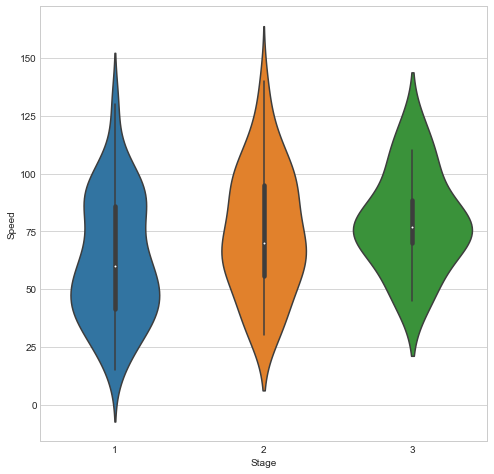

In [23]:
plt.figure(figsize=(8,8))

# Make the violoin plot
sns.violinplot(x = 'Stage', y = 'Speed', data = pokemon)

plt.show()

From our plot we can see that pok&eacute;mon tend to get faster as they evolve. However, the fastest pok&eacute;mon is in stage 2.

Back to looking at data by `Type 1`.

### Setting Colors

If you're a fan of pok&eacute;mon you probably didn't care for the colors that went with each type. We can set custom colors in `seaborn` and use them in our visualizations.

In [24]:
# A List of Pokemon Colors
# Note these colors came Bulpapedia, the pokemon wiki
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Now we can use the `palette` argument to color our charts. Let's look at `Speed` by `Type 1`.

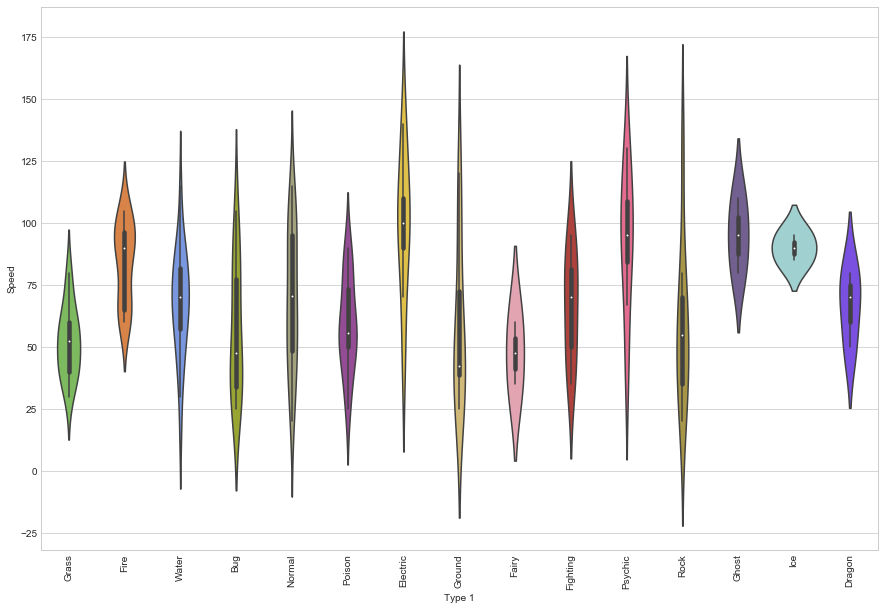

In [25]:
# Violin plot of Speed by Type 1
plt.figure(figsize = (15,10))
sns.violinplot(x = 'Type 1', y = 'Speed', data = pokemon,
              palette = pkmn_type_colors)
plt.xticks(rotation = 90)
plt.show()

Electric types seem to be the quickest. So you know who to bet on in a pok&eacute;mon race.

# Swarm Plots and Overlays

While violin plots are nice, they may give a misrepresentation because they don't tell us how many total data points exist within the curve.

Let's see an example.

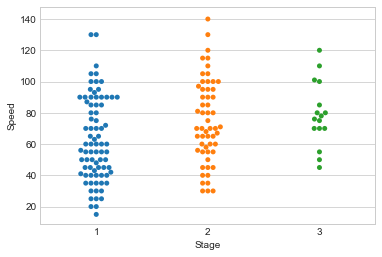

In [26]:
# Swarm plot of speed by Stage
sns.swarmplot(x = 'Stage', y = 'Speed', data = pokemon)
plt.show()

`seaborn` is really cool in that we can overlay our swarm plot on top of our violin plot. This way we can see just how misleading the violin plot was.

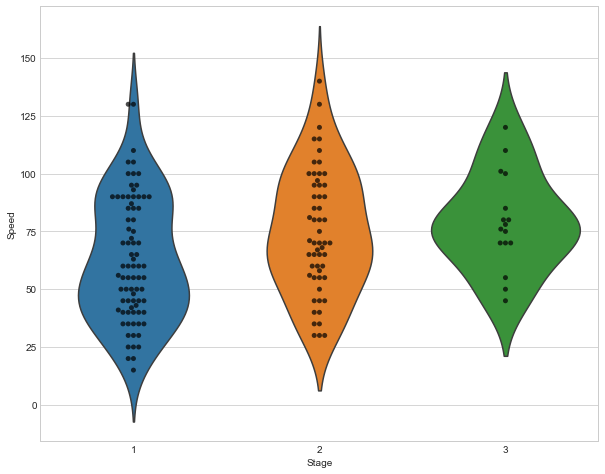

In [27]:
plt.figure(figsize = (10,8))

# make the violin plot, but remove the inner bars
sns.violinplot(x = 'Stage', y = 'Speed', data = pokemon,
              inner = None)

# This overlays the swarmplot
# Note it must come second in your code
# We make all of our dots black and slightly transparent (alpha)
sns.swarmplot(x = 'Stage', y = 'Speed', data = pokemon,
             color = 'k', alpha = 0.7)

plt.show()

### Exercise

#### Overlay a swarm plot on top of on our violin plot of `Speed` by `Type`

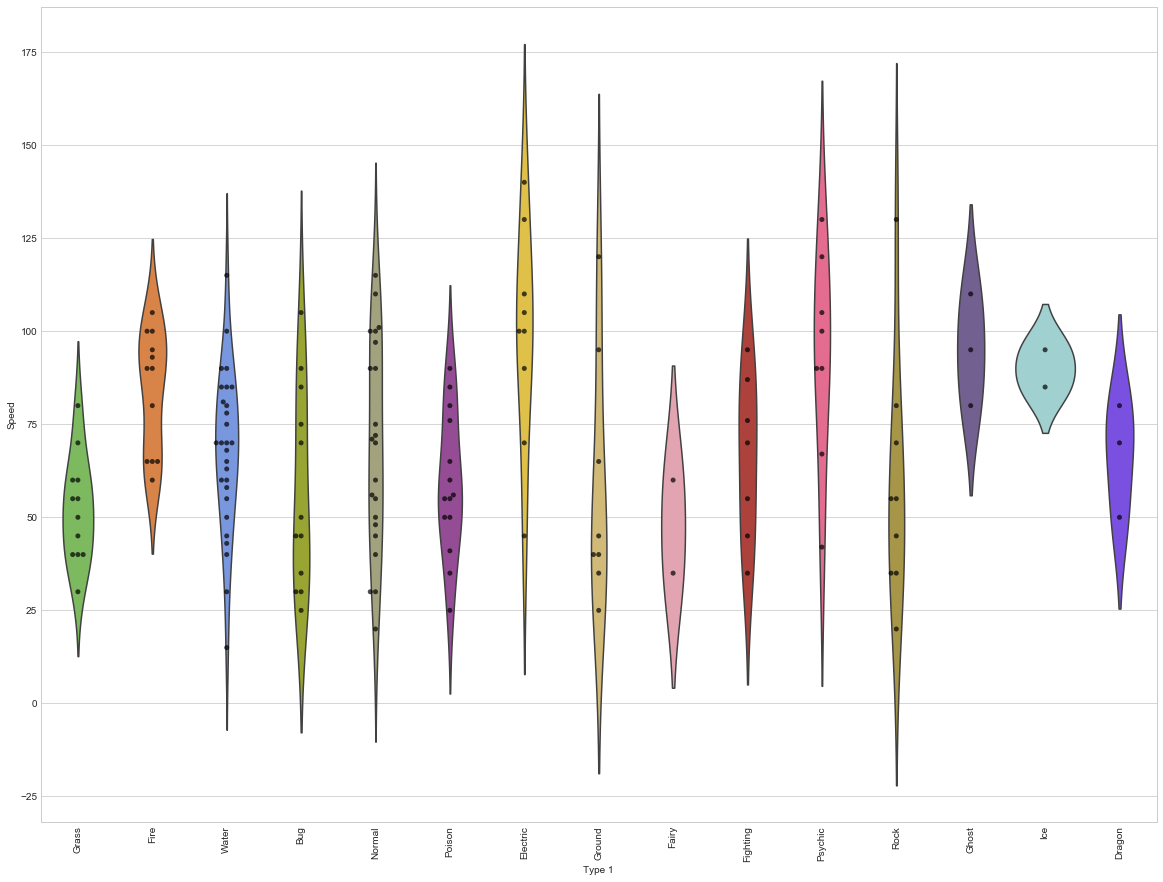

In [28]:
# Write your answer here

plt.figure(figsize = (20,15))

sns.violinplot(x = 'Type 1', y = 'Speed', data = pokemon,
              palette = pkmn_type_colors, inner = None)


sns.swarmplot(x = 'Type 1', y = 'Speed', data = pokemon, color = 'k', alpha = .7)

plt.xticks(rotation = 90)
plt.show()


## Bar Plots and Factor Plots

The last plot we'll go over how to make are bar plots. 

Let's say we're interested in knowing how many pok&eacute;mon of each `Stage` there are. A bar plot is a natural way to visualize this. In `seaborn` this is accomplished through a `countplot`.

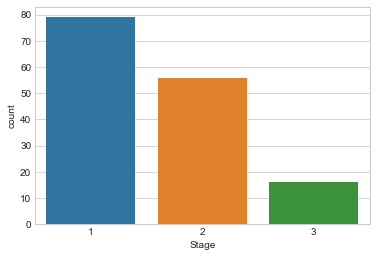

In [29]:
# make a bar plot
sns.countplot(x = 'Stage', data = pokemon)

plt.show()

There are a lot more `Stage` 1 pok&eacute;mon than 3. 

We can also look at the distribution of `Type`s based on each `Stage`. This can be accomplished with a `seaborn` `factorplot`.

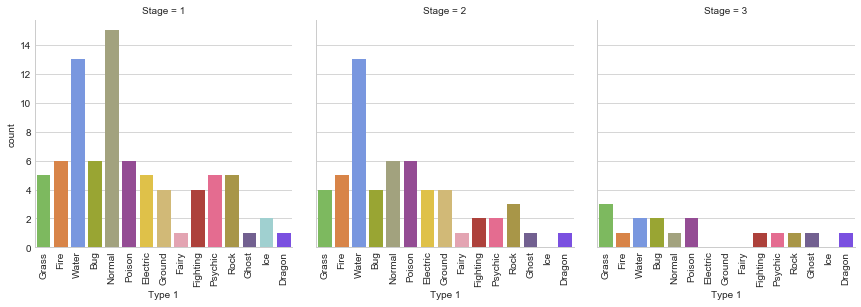

In [30]:
# make a factor plot of Type, factoring by Stage
# Assign the factorplot to g
g = sns.factorplot(x = 'Type 1', data = pokemon, 
                   palette = pkmn_type_colors,
                   col = 'Stage',
                   kind = 'count')

# rotate the x labels
g.set_xticklabels(rotation=90)

plt.show()

There is plenty more `seaborn` to explore, there is no way to cover everything in one hour. You can learn more on the [`seaborn` tutorial](http://seaborn.pydata.org/examples/).

## Exercise/Homework

#### Run the following lines of code.

In [31]:
AllPokemon = pd.read_csv('Data/AllPokemon.csv',index_col = 0)

In [32]:
AllPokemon.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


#### This `pandas` dataframe contains data on all of the existing pok&eacute;mon. Explore this dataset using the techniques we've learned about in this notebook

In [123]:
# Explore here :-D




